# Задание 2. Стекло

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from accuracy_dependence import get_accuracy_dependence_on_the_k, get_accuracy_dependence_on_the_metric, normalize_data

## Чтение данных из файла

In [2]:
data = pd.read_csv('datasets/glass.data', header=None)
y = data[10]
X = data.loc[:, np.arange(9) + 1]
X = normalize_data(X)
X

,1,2,3,4,5,6,7,8,9
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0


## Настройка сетки поиска параметров

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, random_state=1)

clf = KNeighborsClassifier()
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
search_grid = {'n_neighbors': range(1, 40),
              'p': range(1, 40),
               'weights': ['uniform', 'distance']}
gscv = GridSearchCV(clf, param_grid=search_grid, cv=kf, n_jobs=-1, verbose=1)
gscv.fit(X_train, y_train)
# print(pd.DataFrame(gscv.cv_results_))
print(gscv.best_params_)
print(gscv.score(X_test, y_test))
print('Predicted class: ' + str(gscv.predict(array([1.516, 11.7, 1.01, 1.19, 72.59, 0.43, 11.44, 0.02, 0.1]).reshape(1, -1)).item(0)))

Fitting 5 folds for each of 3042 candidates, totalling 15210 fits
{'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
0.7407407407407407
Predicted class: 7


## Вычисление важностей атрибутов

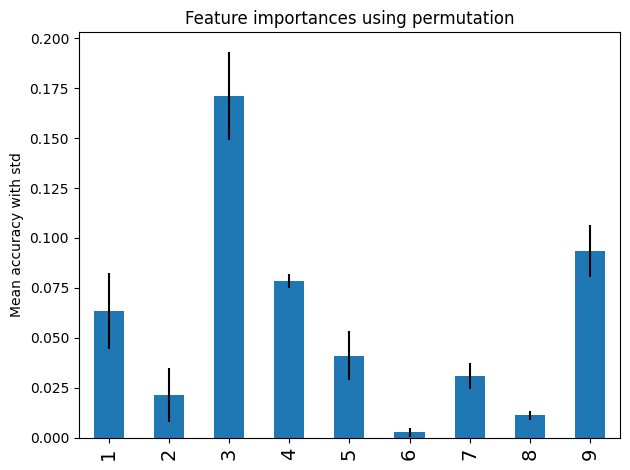

In [4]:
result = permutation_importance(gscv, X, y, n_repeats=5, n_jobs=-1)
feature_importances = pd.Series(result.importances_mean, index=X.columns)
fig, ax = plt.subplots()
feature_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation")
ax.set_ylabel("Mean accuracy with std")
plt.xticks(fontsize=14)
fig.tight_layout()
plt.show()

In [5]:
print('Least important feature: ' + str(feature_importances.idxmin()))

Least important feature: 6


## Графическое отображение результата

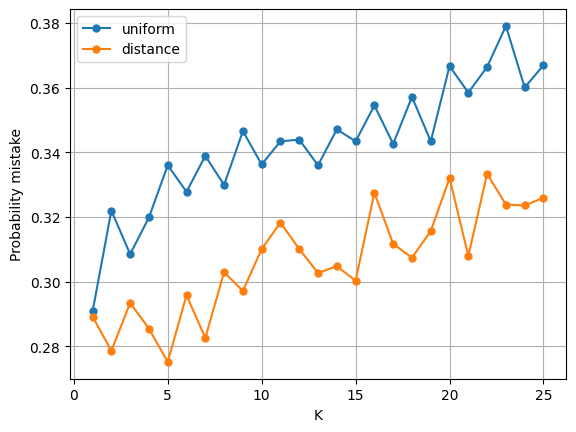

In [6]:
plt.plot(get_accuracy_dependence_on_the_k(X=X, y=y, uniform=True), label='uniform', marker='.', markersize=10)
plt.plot(get_accuracy_dependence_on_the_k(X=X, y=y, uniform=False), label='distance', marker='.', markersize=10)
plt.xlabel('K')
plt.ylabel('Probability mistake')
plt.legend()
plt.grid()
plt.show()

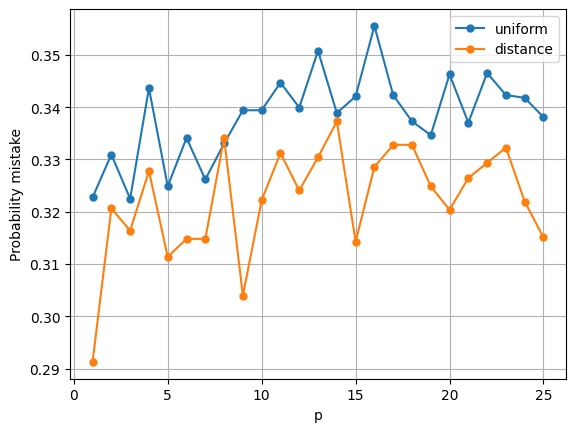

In [7]:
plt.plot(get_accuracy_dependence_on_the_metric(X, y, k=3, uniform=True), label='uniform', marker='.', markersize=10)
plt.plot(get_accuracy_dependence_on_the_metric(X, y, k=3, uniform=False), label='distance', marker='.', markersize=10)
plt.xlabel('p')
plt.ylabel('Probability mistake')
plt.legend()
plt.grid()
plt.show()